



# Module 3- Regression & Beta Calculation



   ### Welcome to the Answer notebook for Module 3 ! 
Make sure that you've submitted the module 2 notebook and unlocked Module 3 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_gold = pd.read_csv('GOLD.csv')
print(df_gold.head(5))

print( df_gold.tail(5))

           Date  Price   Open   High    Low    Vol. Change %   Pred         new
0  May 04, 2017  28060  28400  28482  28025   0.08K   -1.79%  738.0  117.570740
1  May 05, 2017  28184  28136  28382  28135   0.06K    0.44% -146.0  295.430176
2  May 08, 2017  28119  28145  28255  28097   7.85K   -0.23%   30.0  132.123714
3  May 09, 2017  27981  28125  28192  27947  10.10K   -0.49%  357.0  101.298064
4  May 10, 2017  28007  28060  28146  27981   9.28K    0.09%  124.0  112.153318
             Date  Price   Open   High    Low   Vol. Change %  Pred         new
507  Apr 26, 2019  31868  31851  31934  31705  9.67K    0.08%   NaN  247.177322
508  Apr 30, 2019  31625  31800  31824  31597  6.44K   -0.76%   NaN   52.201158
509  May 01, 2019  31563  31604  31657  31503  1.55K   -0.20%   NaN  113.293305
510  May 02, 2019  31203  31420  31425  31160  0.48K   -1.14%   NaN   48.365693
511  May 03, 2019  31341  31250  31500  31163  0.08K    0.44%   NaN  429.924911


In [ ]:
# to check for null values 
df_gold.isna().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [ ]:
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold.set_index('Date', inplace = True)
df_gold.head(5)


,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [ ]:
# checking where is empty
empties = np.where(pd.isnull(df_gold))
print('(starting row, col) = (', empties[0][0],',', empties[1][0], ')')

(starting row, col) = ( 411 , 6 )


In [ ]:
df_train = df_gold.dropna()
df_test = df_gold.iloc[411: , :]

**Linear Regression**

In [ ]:
# Importing required dependencies 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

##### Part 1 : For Pred

In [ ]:
# creatind dataset 
X = df_train[['Open', 'High', 'Low']].values
y_pred = df_train.Pred.values
y_new = df_train.new.values

# model initialization and fitting  
model1 = LinearRegression()
model1.fit(X, y_pred)
print("pred's score : ", model1.score(X, y_pred))
print("pred's coeff, : ", model1.coef_, '\nbias :', model1.intercept_)

# Prediction for training data
X_test = df_test[['Open', 'High', 'Low']].values
y_pred_test = model1.predict(X_test)
new_pred = np.hstack((y_pred, y_pred_test))

pred's score :  0.7962059289157766
pred's coeff, :  [ 1.87728492  0.55565405 -2.43980328] 
bias : 203.52838576001255


In [ ]:
df_gold['Pred'] = new_pred

##### Part 2 : For new

In [ ]:
# creatind dataset 
X = df_train[['Open', 'High', 'Low']].values
y_pred = df_train.Pred.values
y_new = df_train.new.values

# model initialization and fitting  
model2 = LinearRegression()
model2.fit(X, y_new)
print("new's score : ", model2.score(X, y_new))
print("new's coeff, : ", model2.coef_, '\nbias :', model2.intercept_)

new's score :  0.9052828458304787
new's coeff, :  [-1.56905117  1.7921037  -0.22656291] 
bias : 102.771887260319


###### Plot

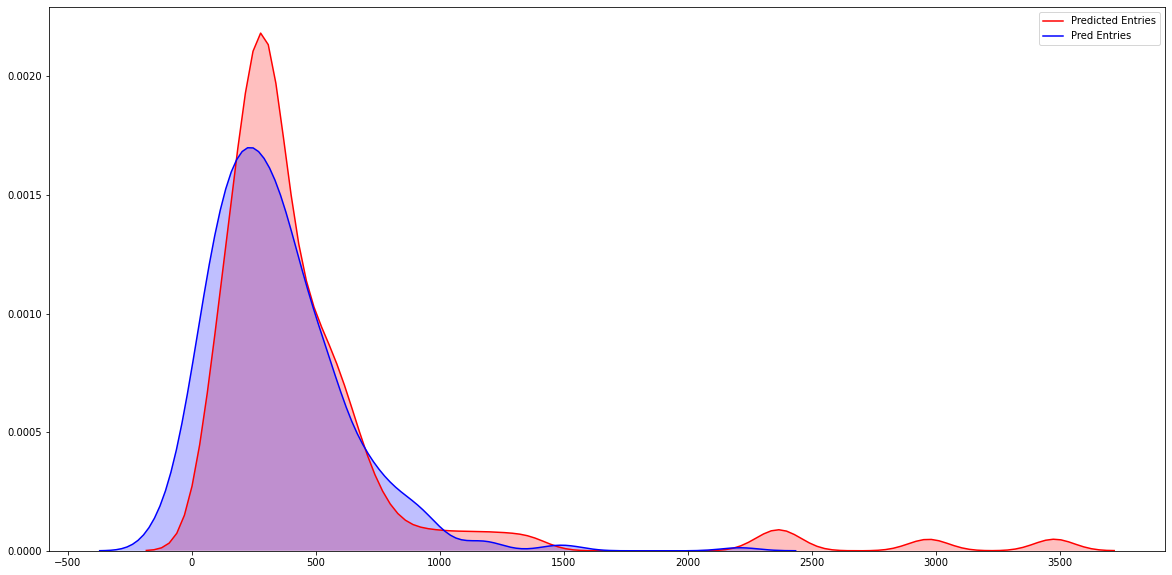

In [ ]:
plt.figure(figsize = (20, 10))
ax = sns.kdeplot(y_pred_test, label = 'Predicted Entries', shade = True, color = 'r')
ax = sns.kdeplot(y_pred, label = 'Pred Entries', shade = True, color = 'blue')

**Polynomia Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree = 2)), 
                  ('linear', LinearRegression())])

model11 = model.fit(X, y_pred)
print("Pred's score : ", model.score(X, y_pred))
print("Pred's coeff. : ", model.named_steps['linear'].coef_)
print('')

model12 = model.fit(X, y_new) 
print("new's score : ", model.score(X, y_new))
print("new's coeff. : ", model.named_steps['linear'].coef_)

Pred's score :  0.8159060375045437
Pred's coeff. :  [ 0.00000000e+00  8.31012462e-01  4.41739689e+00 -4.79572276e+00
  7.22421621e-04 -2.88457330e-03  1.50145869e-03  1.87985683e-03
 -1.03173471e-03 -1.94673740e-04]

new's score :  0.9147522370858019
new's coeff. :  [ 0.00000000e+00 -2.09388978e+00  3.74002532e+00 -1.41689019e+00
  3.62468554e-04 -1.47862677e-03  7.85041523e-04  9.75820068e-04
 -5.52469295e-04 -9.59030628e-05]


Conclusion : Since, the new column is giving the score for SLR higher than the pred's column score, hence according to me new is linear function of OHL column. Also the Pred is polynomial function of OHL columns because it gives more positive change in score than the SLR while comparing the new column.

### Query 3.2 
Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -
The daily Beta value for the past 3 months. (Daily= Daily returns)
The monthly Beta value. (Monthly= Monthly returns)
Refrain from using the (covariance(x,y)/variance(x)) formula. 
Attempt the question using regression.(Regression Reference) 
Were the Beta values more or less than 1 ? What if it was negative ? 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [ ]:
# selecting MINDTREE data as stock
df = pd.read_csv('MINDTREE.csv')
df = df[df.Series == 'EQ']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

# selecting nifty as index
df_nifty = pd.read_csv('Nifty50.csv')
df_nifty['Date'] = pd.to_datetime(df_nifty['Date'])
df_nifty.set_index('Date', inplace = True)
df

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90
2017-05-16,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65
2017-05-17,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35
2017-05-18,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05
2017-05-19,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,MINDTREE,EQ,981.75,982.80,985.00,975.00,981.00,979.95,979.77,1242934,1.217784e+09,10864,884988,71.20
2019-05-08,MINDTREE,EQ,979.95,981.00,985.00,971.05,982.00,980.50,979.84,4301316,4.214603e+09,13038,3851210,89.54
2019-05-09,MINDTREE,EQ,980.50,979.60,983.15,976.10,980.90,980.45,980.02,3787159,3.711482e+09,8159,3479880,91.89


In [ ]:
df_nifty

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


###### Dailty Beta

In [ ]:
index = df_nifty["Open"].where(df.index == df_nifty.index)
inedexReturn = (index.pct_change()*100).dropna().values.reshape(-1, 1)

stock = df["Open Price"].where(df.index == df_nifty.index)
stockReturn = (stock.pct_change()*100).dropna().values.reshape(-1, 1)

regression_beta_d = LinearRegression().fit(inedexReturn[len(inedexReturn)-60:].reshape(-1, 1), stockReturn[len(stockReturn)-60:].reshape(-1, 1))
print("3 Month's Daily Beta = ", regression_beta_d.coef_.tolist())

3 Month's Daily Beta =  [[0.2852748862290394]]


###### Monthly Beta

In [ ]:
# capturing last month's index and stock

index_m_last = index.loc[index.groupby(index.index.to_period('M')).apply(lambda x : x.index.max())]
indexReturn_m_last = (index_m_last.pct_change()*100).dropna().values.reshape(-1, 1)

stock_m_last = stock.loc[stock.groupby(stock.index.to_period('M')).apply(lambda x : x.index.max())]
stockReturn_m_last = (stock_m_last.pct_change()*100).dropna().values.reshape(-1, 1)

regression_beta_m = LinearRegression().fit(indexReturn_m_last, stockReturn_m_last)
print("Monthly Beta = ", regression_beta_m.coef_.tolist())

Monthly Beta =  [[1.3399222274052873]]


###### Using Covariance

In [ ]:
monthly_covMat = np.cov(indexReturn_m_last.reshape(1, -1), stockReturn_m_last.reshape(1, -1))
print('Monthly Beta : ', monthly_covMat[0][1]/monthly_covMat[0][0])

Monthly Beta :  1.3399222274052878


# Discussion:

*   Daily Beta of MINDTREE for last 3 months (~0.285) is less than 1 showing it is less volatile than the benchmark. And the postive value of the Beta implies that the rise in market increses the stock price. 
*   Monthly Beta of MINDTREE for last month (~1.34) is greater than 1 showing it is volatile than the benchmark. And the postive value of the Beta implies that the rise in market increses the stock price.
*   There are no negative values for beta in this case, which means the inverse cases of market vs stock price variation does not occur.
*   We also compared the monthly Beta value from regression and covariance and they both came out to be exact same. 





